In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Первый элемент

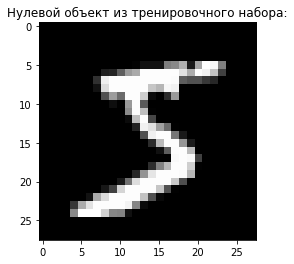

In [4]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [5]:
y_train[0]

5

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)


Преобразуем данные

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=46, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)



Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [9]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.098, 0.168, 0.23 , 0.284, 0.333, 0.375, 0.408, 0.437, 0.464,
       0.488, 0.509, 0.53 , 0.547, 0.564, 0.579, 0.594, 0.608, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.756, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811])

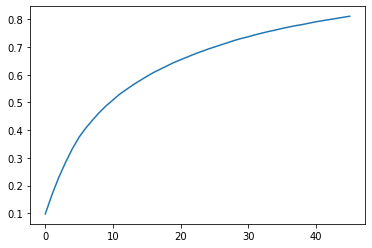

In [10]:
plt.plot(np.arange(46), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [13]:
len(X_test[0])

784

In [14]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [17]:
CM

array([[1376,    0,  100,   59,    2,   50,   42,   24,   37,    3],
       [   0, 1836,   32,   10,    8,    8,   50,  121,    8,    2],
       [  63,   11,  867,   77,   68,   81,  434,   11,  136,   15],
       [  23,    6,   65, 1493,   17,  103,   10,   19,  106,   31],
       [  13,   12,   87,    7, 1325,   17,   50,   39,   68,  138],
       [  91,    9,  175,  213,   55,  699,   11,   38,  267,   33],
       [  40,   24,  727,   29,   41,   32,  684,   23,  135,   31],
       [  55,   57,   22,   18,   59,   34,  167, 1282,   32,  160],
       [  46,   46,  134,  286,   64,  433,   43,   28,  589,  104],
       [  21,   15,   39,   63,  349,   43,   34,  148,  214,  898]])

Число верно классифицирвоанных объектов класс 0

In [18]:
CM[0][0]

1376

Определение Accuracy, Precision, Recall и F1 для обученной модели

In [19]:
target_names = ['class 0', 'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

In [20]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.81      0.80      1693
     class 1       0.91      0.88      0.90      2075
     class 2       0.39      0.49      0.43      1763
     class 3       0.66      0.80      0.72      1873
     class 4       0.67      0.75      0.71      1756
     class 5       0.47      0.44      0.45      1591
     class 6       0.45      0.39      0.42      1766
     class 7       0.74      0.68      0.71      1886
     class 8       0.37      0.33      0.35      1773
     class 9       0.63      0.49      0.55      1824

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.60     18000
weighted avg       0.62      0.61      0.61     18000



Вероятность отнесения 5 любых изображений из тестового набора к назначенному классу

In [22]:
print(clf.predict_proba(X_train) [1] [y_pred[1]])
print(clf.predict_proba(X_train) [2] [y_pred[2]])
print(clf.predict_proba(X_train) [3] [y_pred[4]])
print(clf.predict_proba(X_train) [5] [y_pred[8]])
print(clf.predict_proba(X_train) [8] [y_pred[16]])

0.005362299133610811
0.0
0.37295649732297886
0.7424020787957045
0.0850018506010037


Число объектов класса 2 отнесенных к классу 8

In [23]:
CM[2][8]

136